In [1]:
!pip install lightgbm==3.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.8 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [5]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LECO/input_files/distan_lat43.302lon-8.377p4R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [7]:
import pandas as pd

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LECO/input_files/LECOY2018Y2022.csv",
                          usecols = ["time","visibility_o"],
                          parse_dates=["time"]).set_index("time")

station["visibility_o"].describe()

count    89595.000000
mean      9175.008259
std       2195.986400
min         48.000000
25%       9994.000000
50%       9994.000000
75%       9994.000000
max       9994.000000
Name: visibility_o, dtype: float64

In [8]:
station["visibility_o"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n))

visibility_o
9994.0    83%
8996.0     3%
7998.0     2%
7001.0     2%
6003.0     1%
         ... 
2301.0     0%
1593.0     0%
3106.0     0%
644.0      0%
756.0      0%
Name: proportion, Length: 63, dtype: object

**Station visibility to interval**

In [9]:
#visibility to interval
interval = pd.IntervalIndex.from_tuples([(-0.1,800), (800, 1500),(1500,3000),(3000,5000),(5000,100000)])
labels = ['800', '1500',"3000","5000","9999"]
station["vis_l"] = pd.cut(station["visibility_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

print(station.sample(20))
print("\nVisibility frequencies.")
station["vis_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n))

                     visibility_o vis_l
time                                   
2022-09-09 11:00:00        9994.0  9999
2021-06-29 19:00:00        9994.0  9999
2020-06-12 16:00:00        9994.0  9999
2019-07-07 05:00:00        8996.0  9999
2019-11-19 03:00:00        9994.0  9999
2020-08-04 13:00:00        9994.0  9999
2022-11-06 23:30:00        9994.0  9999
2020-06-02 19:00:00        9994.0  9999
2019-11-08 02:00:00        7001.0  9999
2020-09-21 11:30:00        9994.0  9999
2021-04-26 04:30:00        3492.0  5000
2022-08-02 03:30:00        9994.0  9999
2021-06-11 12:00:00        9994.0  9999
2019-03-11 07:00:00         145.0   800
2021-10-22 02:00:00        9994.0  9999
2020-08-25 10:30:00        9994.0  9999
2019-11-03 20:00:00        9994.0  9999
2022-09-11 13:00:00        9994.0  9999
2020-02-24 19:00:00        9994.0  9999
2018-04-26 13:00:00        9994.0  9999

Visibility frequencies.


vis_l
9999    93%
800      2%
3000     2%
5000     2%
1500     1%
nan      0%
Name: proportion, dtype: object

**Forecast**

In [10]:
#Forecast d
#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LECO/input_files/lat43.302lon-8.377p4R4KmD0Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LECO/input_files/lat43.302lon-8.377p4R4KmD0Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LECO/input_files/lat43.302lon-8.377p4R4KmD0Y2020.csv",parse_dates=["time"])
mody2021 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LECO/input_files/lat43.302lon-8.377p4R4KmD0Y2021.csv",parse_dates=["time"])
mody2022 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LECO/input_files/lat43.302lon-8.377p4R4KmD0Y2022.csv",parse_dates=["time"])
model1k = pd.concat([mody2018,mody2019,mody2020,mody2021,mody2022]).drop(columns=["Unnamed: 0"]).set_index("time")

model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,215.747849,0.0,902.306519,5.105255,13.569287,102718.562500,283.712128,0.804692,24051.365234,14.114291,...,0.000000,-0.000477,0.20000,0.000000,0.000000,0.200000,5563.714844,1548.354980,248.946930,273.993866
2018-01-01 02:00:00,215.917984,0.0,914.343018,5.875232,14.852463,102704.343750,284.151947,0.809324,24039.359375,16.504606,...,3.170000,-34.650459,0.20000,0.000000,0.000000,0.200000,5569.226074,1547.240967,249.484375,273.890198
2018-01-01 03:00:00,223.666367,0.0,940.227722,5.960269,14.331568,102696.648438,284.475311,0.807002,24040.320312,17.431562,...,17.260000,-24.117239,0.30000,0.101562,0.000000,0.300000,5577.497070,1547.338013,249.928879,273.821869
2018-01-01 04:00:00,228.431320,0.0,956.362671,6.237044,15.082509,102694.281250,284.740265,0.815113,24042.085938,17.804031,...,30.129999,-19.603157,0.30000,0.429688,0.000000,0.429688,5584.778809,1548.901001,250.126190,273.762177
2018-01-01 05:00:00,233.394775,0.0,1000.156311,6.957641,15.846083,102686.031250,285.119202,0.827759,24040.648438,18.838913,...,50.369999,-10.988547,0.20000,0.000000,0.000000,0.200000,5587.893066,1549.415039,250.114441,274.289764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,196.194504,0.0,1728.410522,6.787476,15.680066,101285.656250,286.803375,0.799586,24039.525391,24.996758,...,0.000000,0.000188,0.30000,0.000000,0.328125,0.328125,5544.549805,1437.326050,255.119003,278.081055
2022-12-31 20:00:00,196.235443,0.0,1765.730835,7.008511,15.354391,101351.742188,286.676361,0.757733,24039.185547,30.592403,...,0.000000,0.000438,0.20000,0.000000,0.218750,0.218750,5547.923828,1442.520996,254.816254,278.311188
2022-12-31 21:00:00,191.455536,0.0,1723.741089,7.775247,17.001736,101384.421875,286.187012,0.787016,24044.787109,28.796240,...,0.000000,-0.000937,0.10000,0.000000,0.242188,0.242188,5549.165039,1447.194946,254.677689,278.057617


**Label meteorological model visibility. Concatenate Station and meteorological model. Few discrepancies between Station (half hours) and Station (only 0 o'clock hours). Less visibilty in half hours**  

In [11]:
#label meteorological model visbility points 0 and 1
model1k["visibility0_l"] = pd.cut(model1k["visibility0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model1k["visibility1_l"] = pd.cut(model1k["visibility1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

#concat station model
df_all1k = pd.concat([station,model1k],axis=1).dropna()
df_all1k = df_all1k.drop(columns=["visibility_o"])

#meteorological model frequencies
print("Meteorological model point 0")
print(df_all1k["visibility0_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n)))
print("\nMeteorological model point 1")
print(df_all1k["visibility1_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n)))

#Station frequencies
print("\nActual visibility frequencies o'clock hours")
df_all1k["vis_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n))

Meteorological model point 0
visibility0_l
9999    97%
800      3%
5000     0%
3000     0%
1500     0%
Name: proportion, dtype: object

Meteorological model point 1
visibility1_l
9999    97%
800      3%
5000     0%
3000     0%
1500     0%
Name: proportion, dtype: object

Actual visibility frequencies o'clock hours


vis_l
9999    94%
800      2%
5000     2%
3000     2%
1500     1%
Name: proportion, dtype: object

**Scatter plot significant meteorological variables and vis_l**

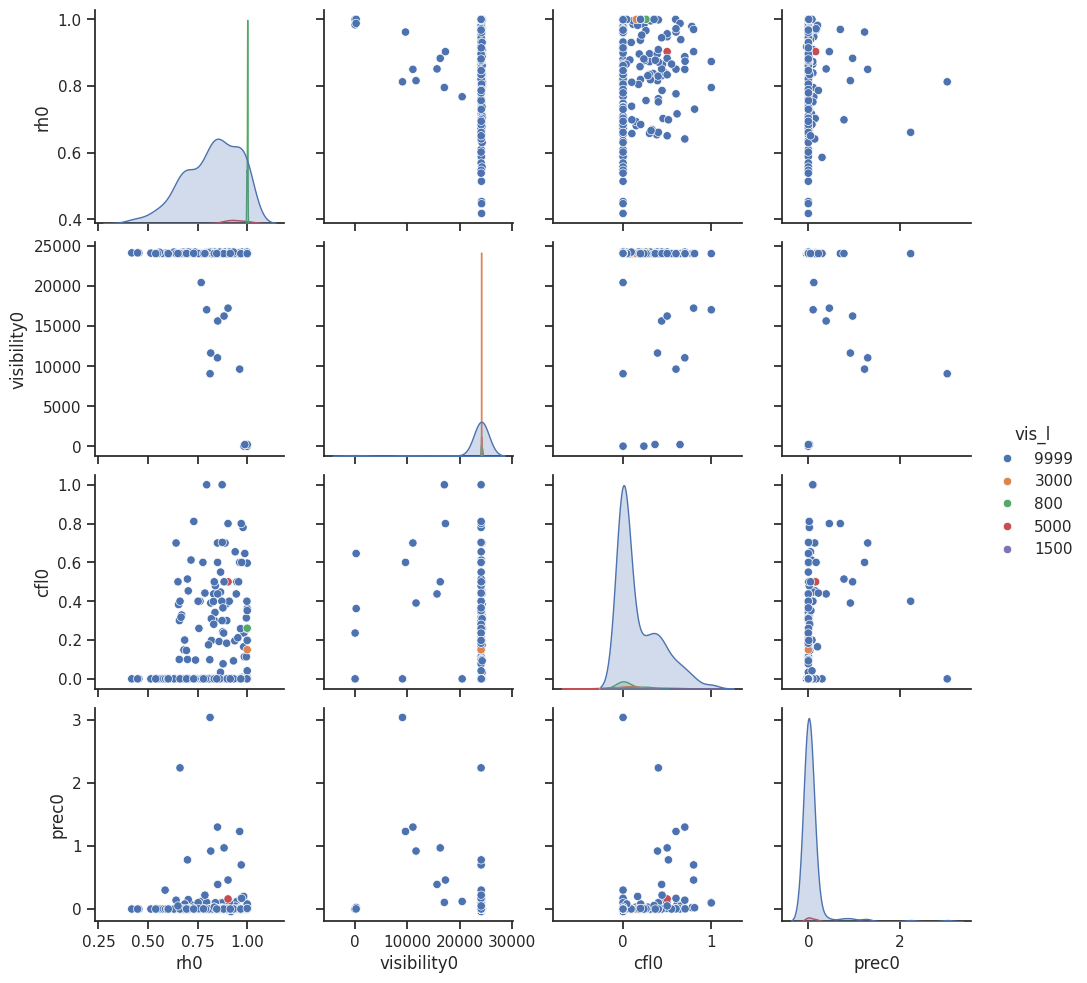

In [12]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["vis_l","rh0","visibility0","cfl0","prec0"]].sample(200), hue="vis_l");

**Scatter plot 3 PCA variables and vis_l**

In [13]:
df_all1k.iloc[:,1:-2].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'dir3', 'snow_prec3', 'snowlevel3', 'mod3', 'wind_gust3', 'mslp3',
       'temp3', 'rh3', 'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3',
       'prec3', 'swflx3', '

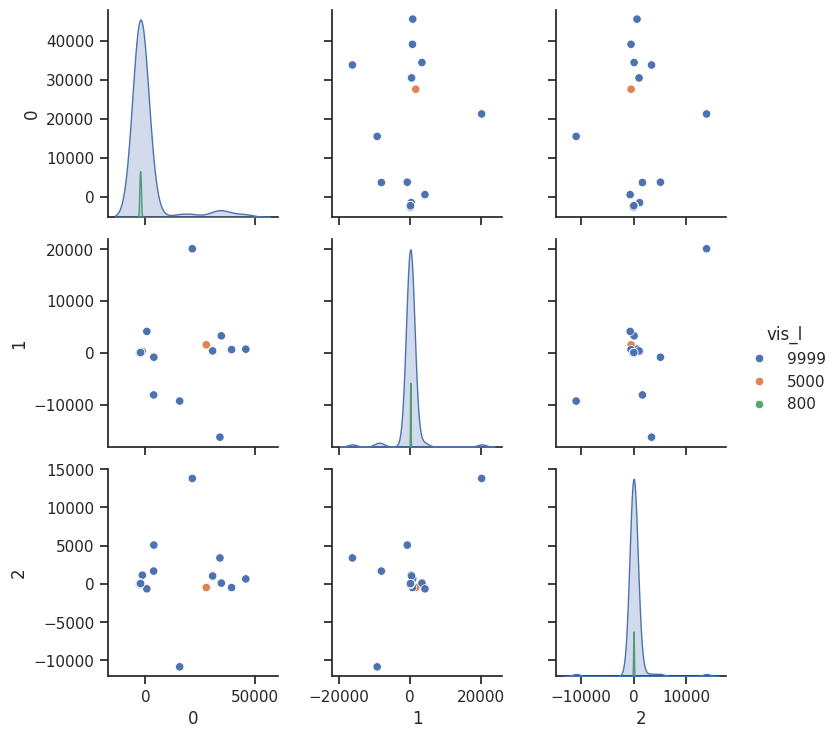

In [14]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:-2]),
                                                        index =df_all1k.index)
df_pca["vis_l"] = df_all1k.vis_l
sns.pairplot(df_pca.sample(100), hue="vis_l");

**Meteorological model score accuracy**

In [15]:
from sklearn.metrics import classification_report

# HSS point 0
print("\nConfusion matrix point 0")
cm = pd.crosstab(df_all1k.vis_l,df_all1k.visibility0_l ,margins=True,)
print(cm)


print("\nQuality report Meteorological model point 0")
print(pd.DataFrame(classification_report(df_all1k.vis_l,df_all1k.visibility0_l,output_dict=True)).T)

# HSS point 1
print("\nConfusion matrix point 1")
cm = pd.crosstab(df_all1k.vis_l,df_all1k.visibility1_l ,margins=True,)
print(cm)


print("\nQuality report Meteorological model point 1")
print(pd.DataFrame(classification_report(df_all1k.vis_l,df_all1k.visibility1_l,output_dict=True)).T)


Confusion matrix point 0
visibility0_l  1500  3000  5000   800   9999    All
vis_l                                              
1500              0     3     1    29    190    223
3000              2     7    13    42    586    650
5000              2     3    12    46    622    685
800               0     1     1    51    806    859
9999             45    57   104   881  37340  38427
All              49    71   131  1049  39544  40844

Quality report Meteorological model point 0
              precision    recall  f1-score       support
1500           0.000000  0.000000  0.000000    223.000000
3000           0.098592  0.010769  0.019417    650.000000
5000           0.091603  0.017518  0.029412    685.000000
800            0.048618  0.059371  0.053459    859.000000
9999           0.944265  0.971713  0.957792  38427.000000
accuracy       0.915924  0.915924  0.915924      0.915924
macro avg      0.236615  0.211874  0.212016  40844.000000
weighted avg   0.892514  0.915924  0.903040  4084

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [16]:
from scipy.stats import chi2_contingency

#only cm point 1 similar point 0

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:5,0:5])

#degrees of freedoom (rows-1)*(columns-1) to test association between two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Statistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between metmodel forecast and observed values")
else:
    print("Retain H0,There is no association between metmodel forecast and observed values")


p-value: 1.0210765795596103e-117
Significance level: 0.01
Degres of of freedom:  16
Statistic 601.651231990861
Reject H0,There is an association between metmodel forecast and observed values


In [18]:
df_all1k = df_all1k.drop(columns=["visibility0_l","visibility1_l"])
df_all1k

,vis_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,9999,215.747849,0.0,902.306519,5.105255,13.569287,102718.562500,283.712128,0.804692,24051.365234,...,0.000000,-0.000477,0.2,0.000000,0.0,0.200000,5563.714844,1548.354980,248.946930,273.993866
2018-01-01 02:00:00,9999,215.917984,0.0,914.343018,5.875232,14.852463,102704.343750,284.151947,0.809324,24039.359375,...,3.170000,-34.650459,0.2,0.000000,0.0,0.200000,5569.226074,1547.240967,249.484375,273.890198
2018-01-01 03:00:00,9999,223.666367,0.0,940.227722,5.960269,14.331568,102696.648438,284.475311,0.807002,24040.320312,...,17.260000,-24.117239,0.3,0.101562,0.0,0.300000,5577.497070,1547.338013,249.928879,273.821869
2018-01-01 04:00:00,9999,228.431320,0.0,956.362671,6.237044,15.082509,102694.281250,284.740265,0.815113,24042.085938,...,30.129999,-19.603157,0.3,0.429688,0.0,0.429688,5584.778809,1548.901001,250.126190,273.762177
2018-01-01 05:00:00,9999,233.394775,0.0,1000.156311,6.957641,15.846083,102686.031250,285.119202,0.827759,24040.648438,...,50.369999,-10.988547,0.2,0.000000,0.0,0.200000,5587.893066,1549.415039,250.114441,274.289764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 19:00:00,9999,205.438812,0.0,2140.130859,10.966944,20.408443,101224.937500,289.855621,0.844320,24038.054688,...,0.000000,0.000000,0.2,0.320312,0.0,0.320312,5593.541016,1449.093994,256.560760,282.030304
2022-12-30 20:00:00,9999,205.519791,0.0,2128.530762,10.623146,20.809048,101283.632812,289.902374,0.844684,24036.107422,...,1.280000,-8.179551,0.3,0.500000,0.0,0.500000,5598.160156,1454.644043,257.004120,281.343872
2022-12-30 21:00:00,9999,203.523941,0.0,2142.092529,10.237870,20.840071,101280.671875,289.717926,0.853459,24234.943359,...,0.000000,0.000113,0.6,0.437500,0.0,0.600000,5602.586914,1453.765991,257.113007,281.831879


**Machine learning**

In [17]:
#x variables
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'cfh3', 'cfl3', 'cfm3', 'cft3', 'HGT5003', 'HGT8503', 'T5003', 'T8503',
       'visibility0_l', 'visibility1_l'],
      dtype='object', length=102)

**ML LGBMClassifier**

In [19]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS_ml = []

for t in range (0,3):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #ml model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = BernoulliNB().fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion matrix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)


  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)






Confusion matrix  (Machine Learning)

col_0  1500  3000  5000  800  9999   All
vis_l                                   
1500      1     4     5    2    25    37
3000      3    27    10   10    59   109
5000      2    13    15   10    95   135
800       4     8     8  100    64   184
9999     20   101   148  202  7233  7704
All      30   153   186  324  7476  8169

Quality report (Machine Learning)

              precision    recall  f1-score      support
1500           0.033333  0.027027  0.029851    37.000000
3000           0.176471  0.247706  0.206107   109.000000
5000           0.080645  0.111111  0.093458   135.000000
800            0.308642  0.543478  0.393701   184.000000
9999           0.967496  0.938863  0.952964  7704.000000
accuracy       0.902926  0.902926  0.902926     0.902926
macro avg      0.313317  0.373637  0.335216  8169.000000
weighted avg   0.923214  0.902926  0.912017  8169.000000

Confusion matrix  (Machine Learning)

col_0  1500  3000  5000  800  9999   All
vis_

**Add time features**

In [20]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int)

# variables X
df_all1k.iloc[:,1:].columns


Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'cfm3', 'cft3', 'HGT5003', 'HGT8503', 'T5003', 'T8503', 'hour', 'month',
       'dayofyear', 'weekofyear'],
      dtype='object', length=104)

**LGBMClassifier with time variables**

In [21]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)

for t in range (0,3):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)




Confusion marix  (Machine Learning)

col_0  1500  3000  5000  800  9999   All
vis_l                                   
1500      2     4     4    2    25    37
3000      5    22     6   10    66   109
5000      2    14    10   10    99   135
800       3     4     4  108    65   184
9999     11    78   123  148  7344  7704
All      23   122   147  278  7599  8169

Quality report (Machine Learning)

              precision    recall  f1-score      support
1500           0.086957  0.054054  0.066667    37.000000
3000           0.180328  0.201835  0.190476   109.000000
5000           0.068027  0.074074  0.070922   135.000000
800            0.388489  0.586957  0.467532   184.000000
9999           0.966443  0.953271  0.959812  7704.000000
accuracy       0.916391  0.916391  0.916391     0.916391
macro avg      0.338049  0.374038  0.351082  8169.000000
weighted avg   0.924105  0.916391  0.919723  8169.000000

Confusion marix  (Machine Learning)

col_0  1500  3000  5000  800  9999   All
vis_l 

In [22]:
feature_importances = ml_model.feature_importances_
total_sum = sum(feature_importances)
feature_importances_perc = [(importance/total_sum)*100 for importance in feature_importances]
# Print the feature importances as a percentage of total feature importance

for name, importance in zip(X.columns, feature_importances_perc):
    print(f"{name}: {importance:.1f}%")

dir0: 1.7%
snow_prec0: 0.0%
snowlevel0: 1.1%
mod0: 0.8%
wind_gust0: 0.9%
mslp0: 1.3%
temp0: 0.7%
rh0: 1.1%
visibility0: 2.2%
lhflx0: 0.9%
lwflx0: 0.8%
conv_prec0: 0.5%
prec0: 1.5%
swflx0: 0.7%
shflx0: 1.3%
cape0: 0.6%
cin0: 1.5%
cfh0: 0.9%
cfl0: 0.8%
cfm0: 0.4%
cft0: 0.7%
HGT5000: 0.8%
HGT8500: 1.1%
T5000: 0.8%
T8500: 0.9%
dir1: 1.6%
snow_prec1: 0.0%
snowlevel1: 1.0%
mod1: 0.8%
wind_gust1: 0.8%
mslp1: 1.2%
temp1: 0.7%
rh1: 0.9%
visibility1: 2.4%
lhflx1: 1.0%
lwflx1: 0.8%
conv_prec1: 0.4%
prec1: 1.1%
swflx1: 0.7%
shflx1: 1.4%
cape1: 0.7%
cin1: 1.7%
cfh1: 0.8%
cfl1: 0.8%
cfm1: 0.6%
cft1: 0.6%
HGT5001: 0.8%
HGT8501: 0.7%
T5001: 0.7%
T8501: 0.9%
dir2: 1.6%
snow_prec2: 0.0%
snowlevel2: 1.3%
mod2: 0.7%
wind_gust2: 0.9%
mslp2: 1.3%
temp2: 0.9%
rh2: 1.0%
visibility2: 2.1%
lhflx2: 1.0%
lwflx2: 0.7%
conv_prec2: 0.5%
prec2: 1.3%
swflx2: 0.6%
shflx2: 1.2%
cape2: 0.7%
cin2: 1.5%
cfh2: 1.2%
cfl2: 0.7%
cfm2: 0.7%
cft2: 0.8%
HGT5002: 0.6%
HGT8502: 0.8%
T5002: 0.7%
T8502: 0.9%
dir3: 1.5%
snow_prec3: 0.

In [23]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/airport_ml/LECO/algorithms/llmvis_LECO_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])
